# Importing libraries and Data

In [1]:
import pandas as pd 
import numpy as np
import pandasql as psql

import matplotlib.pyplot as plt
df = pd.read_csv('Salaries.csv')
df.head()

C:\Users\Hagress\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


# Exploratory Data Analysis & Data Cleaning 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [3]:
df['BasePay'] = pd.to_numeric(df['BasePay'],errors = "coerce")
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'],errors = "coerce")
df['OtherPay'] = pd.to_numeric(df['OtherPay'],errors = "coerce")
df['Benefits'] = pd.to_numeric(df['Benefits'],errors = "coerce")
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object

In [4]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [5]:
df.drop(["Notes"],axis = 1,inplace = True)
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Agency                   0
Status              110535
dtype: int64

In [6]:
df.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
148649,148650,Roy I Tillery,Custodian,0.0,0.0,0.00,0.0,0.00,0.00,2014,San Francisco,PT
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,San Francisco,PT


In [7]:
df = df[df.ne('Not provided').all(axis=1)]
df.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
148645,148646,Carolyn A Wilson,Human Services Technician,0.0,0.0,0.00,0.0,0.00,0.00,2014,San Francisco,PT
148647,148648,Joann Anderson,Communications Dispatcher 2,0.0,0.0,0.00,0.0,0.00,0.00,2014,San Francisco,PT
148648,148649,Leon Walker,Custodian,0.0,0.0,0.00,0.0,0.00,0.00,2014,San Francisco,PT
148649,148650,Roy I Tillery,Custodian,0.0,0.0,0.00,0.0,0.00,0.00,2014,San Francisco,PT
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,San Francisco,PT


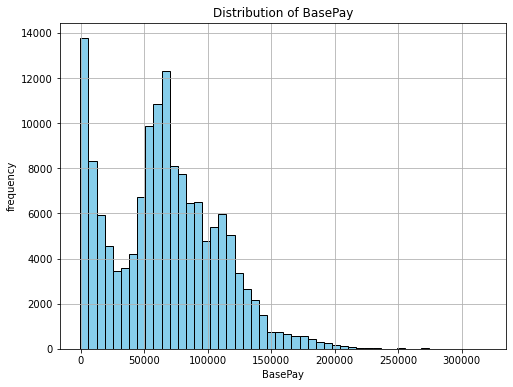

In [8]:
plt.figure(figsize = (8,6))
plt.hist(df["BasePay"],bins=50,color="skyblue",edgecolor="black")
plt.xlabel("BasePay")
plt.ylabel("frequency")
plt.title("Distribution of BasePay")
plt.grid(True)
plt.show()

In [9]:
median_basepay = df["BasePay"].median()
df["BasePay"].fillna(median_basepay , inplace = True)
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Agency                   0
Status              110531
dtype: int64

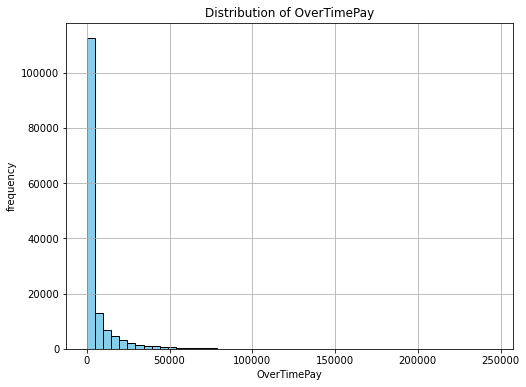

In [10]:
plt.figure(figsize = (8,6))
plt.hist(df["OvertimePay"],bins=50,color="skyblue",edgecolor ="black")
plt.xlabel("OverTimePay")
plt.ylabel("frequency")
plt.title("Distribution of OverTimePay")
plt.grid(True)
plt.show()

In [11]:
median_OvertimePay = df["OvertimePay"].median()
df["OvertimePay"].fillna(median_OvertimePay , inplace = True)
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Agency                   0
Status              110531
dtype: int64

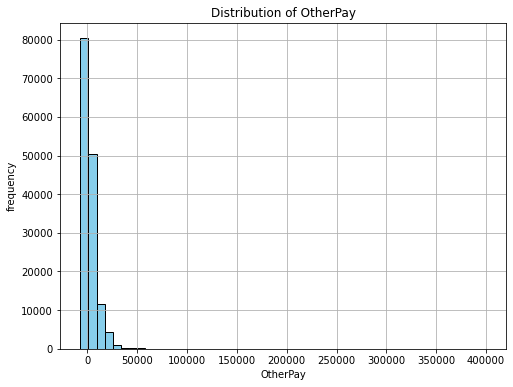

In [12]:
plt.figure(figsize = (8,6))
plt.hist(df["OtherPay"],bins=50,color="skyblue",edgecolor ="black")
plt.xlabel("OtherPay")
plt.ylabel("frequency")
plt.title("Distribution of OtherPay")
plt.grid(True)
plt.show()

In [13]:
median_OtherPay = df["OtherPay"].median()
df["OtherPay"].fillna(median_OtherPay , inplace = True)
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Agency                   0
Status              110531
dtype: int64

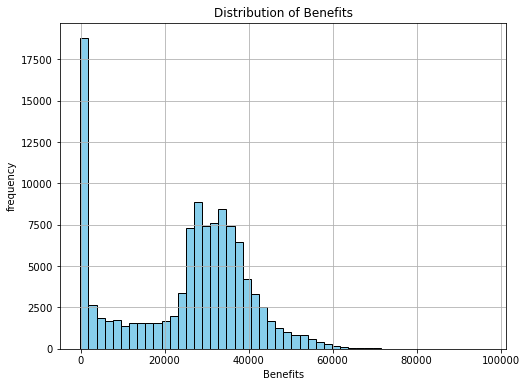

In [14]:
plt.figure(figsize = (8,6))
plt.hist(df["Benefits"],bins=50,color="skyblue",edgecolor ="black")
plt.xlabel("Benefits")
plt.ylabel("frequency")
plt.title("Distribution of Benefits")
plt.grid(True)
plt.show()

In [15]:
median_Benefits = df["Benefits"].median()
df["Benefits"].fillna(median_Benefits , inplace = True)
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Agency                   0
Status              110531
dtype: int64

In [16]:
mode_status = df["Status"].mode()[0]
df["Status"].fillna(mode_status , inplace = True)
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
Status              0
dtype: int64

In [17]:
df['BasePay'] = df['BasePay'].apply(lambda x: max(0, x))
df['OvertimePay'] = df['OvertimePay'].apply(lambda x: max(0, x))
df['OtherPay'] = df['OtherPay'].apply(lambda x: max(0, x))
df['Benefits'] = df['Benefits'].apply(lambda x: max(0, x))
df['TotalPay'] = df['TotalPay'].apply(lambda x: max(0, x))
df['TotalPayBenefits'] = df['TotalPayBenefits'].apply(lambda x: max(0, x))

# Q1: What is the average BasePay across all job titles?


# PYTHON CODE


In [18]:
average_base_pay = df['BasePay'].mean()
print("The average BasePay across all job titles is:", average_base_pay)

The average BasePay across all job titles is: 66320.09110018634


# sql code


In [19]:
query = "SELECT AVG(BasePay) AS average_base_pay FROM df"
result = psql.sqldf(query, locals())
print(result)

   average_base_pay
0        66320.0911


# Q2: Which job title has the highest BasePay?


# PYTHON CODE


In [20]:
highest_basepay= df[df['BasePay'] == df['BasePay'].max()]
job_title = highest_basepay['JobTitle'].values[0]
base_pay = highest_basepay['BasePay'].values[0]
print(f"The job title with the highest BasePay is: {job_title}: {base_pay}")

The job title with the highest BasePay is: Chief of Police: 319275.01


# sql code


In [21]:
query="SELECT JobTitle, BasePay FROM df ORDER BY BasePay DESC LIMIT 1"
result = psql.sqldf(query, locals())
print(result)

          JobTitle    BasePay
0  Chief of Police  319275.01


# Q3: How many unique job titles are there in the dataset?


# PYTHON CODE


In [22]:
df['JobTitle'] = df['JobTitle'].str.strip().str.lower()
unique_job_titles = df['JobTitle'].nunique()
print(unique_job_titles)

1636


# sql code
 

In [23]:
query="SELECT COUNT(distinct JobTitle) AS UniqueJobTitles from df"
result = psql.sqldf(query, locals())
print(result)

   UniqueJobTitles
0             1636


# Q4: What is the total OvertimePay for each year?


# PYTHON CODE


In [24]:
total_overtime_pay = df.groupby('Year')['OvertimePay'].sum()
print(total_overtime_pay)

Year
2011    1.638388e+08
2012    1.846910e+08
2013    1.986214e+08
2014    2.059186e+08
Name: OvertimePay, dtype: float64


# sql code


In [25]:
query="""SELECT Year, SUM(OvertimePay) AS TotalOvertimePay
FROM df
GROUP BY Year"""
result = psql.sqldf(query, locals())
print(result)

   Year  TotalOvertimePay
0  2011      1.638388e+08
1  2012      1.846910e+08
2  2013      1.986214e+08
3  2014      2.059186e+08


# Q5: Which year had the highest average OtherPay?
 

# PYTHON CODE

In [26]:
average_other_pay = df.groupby('Year')['OtherPay'].mean()
year_with_highest_avg_otherpay = average_other_pay.idxmax()
highest_avg_otherpay = average_other_pay.max()
print(year_with_highest_avg_otherpay)

2013


#  sql code

In [27]:
query="""SELECT Year
FROM (
    SELECT Year, AVG(OtherPay) AS AverageOtherPay
    FROM df
    GROUP BY Year
) AS subquery
ORDER BY AverageOtherPay DESC
LIMIT 1"""
result = psql.sqldf(query, locals())
print(result)

   Year
0  2013


# Q6: What is the median TotalPay for each job title?


# PYTHON CODE


In [28]:
median_total_pay_per_job_title = df.groupby('JobTitle')['TotalPay'].median()
print(median_total_pay_per_job_title)

JobTitle
account clerk                                     50401.800
accountant                                        60076.240
accountant i                                      67403.330
accountant ii                                     69386.660
accountant iii                                    89570.445
                                                    ...    
worker's compensation supervisor i                92344.780
x-ray laboratory aide                             60176.955
youth comm advisor                                44449.895
youth commission advisor, board of supervisors    53632.870
zoo curator                                       66686.560
Name: TotalPay, Length: 1636, dtype: float64


# Q7: How many employees are there in each agency?


# PYTHON CODE


In [29]:
employees_per_agency = df['Agency'].value_counts()
print(employees_per_agency)

San Francisco    148650
Name: Agency, dtype: int64


# sql code


In [30]:
query="""SELECT Agency, COUNT(*) AS EmployeeCount
FROM df
GROUP BY Agency"""
result = psql.sqldf(query, locals())
print(result)

          Agency  EmployeeCount
0  San Francisco         148650


# Q8: What is the maximum Benefits offered by any agency?


# PYTHON CODE

In [31]:
max_benefits = df['Benefits'].max()
print(max_benefits)

96570.66


# sql code

In [32]:
query="""SELECT MAX(Benefits) AS max_benefits
FROM df"""
result = psql.sqldf(query, locals())
print(result)

   max_benefits
0      96570.66


# Q9: What is the total BasePay, OvertimePay, and OtherPay for each employee?
 

# PYTHON CODE


In [33]:
totals_per_employee = df.groupby('EmployeeName')[['BasePay', 'OvertimePay', 'OtherPay']].sum()
print(totals_per_employee)

                         BasePay  OvertimePay  OtherPay
EmployeeName                                           
A BERNARD FATOOH        19969.37         0.00     70.54
A Bernard  Fatooh       23908.50         0.00     15.12
A Bernard Fatooh        42533.70         0.00     27.84
A ELIZABETH MARCHASIN   23591.80         0.00   2691.06
A JAMIL NIAZI           69058.19         0.00  18438.02
...                          ...          ...       ...
Zun Jin Zhang He       105225.01      3691.82   6723.91
Zuna Luu                51502.86         0.00   1015.22
Zuna T Luu             109729.00       264.36   2249.99
Zuri  Jones             71986.90         0.00      0.00
Zuri Jones             153256.06         0.00      0.00

[110810 rows x 3 columns]


# sql code

In [34]:
query="""SELECT EmployeeName, 
       SUM(BasePay) AS BasePay, 
       SUM(OvertimePay) AS OvertimePay, 
       SUM(OtherPay) AS OtherPay
FROM df
GROUP BY EmployeeName"""
result = psql.sqldf(query, locals())
print(result)

                 EmployeeName    BasePay  OvertimePay  OtherPay
0            A BERNARD FATOOH   19969.37         0.00     70.54
1           A Bernard  Fatooh   23908.50         0.00     15.12
2            A Bernard Fatooh   42533.70         0.00     27.84
3       A ELIZABETH MARCHASIN   23591.80         0.00   2691.06
4               A JAMIL NIAZI   69058.19         0.00  18438.02
...                       ...        ...          ...       ...
110805       Zun Jin Zhang He  105225.01      3691.82   6723.91
110806               Zuna Luu   51502.86         0.00   1015.22
110807             Zuna T Luu  109729.00       264.36   2249.99
110808            Zuri  Jones   71986.90         0.00      0.00
110809             Zuri Jones  153256.06         0.00      0.00

[110810 rows x 4 columns]


# Q10: Which employee has the highest TotalPayBenefits?


# PYTHON CODE


In [35]:
employee_highest_total_pay_benefits = df.loc[df['TotalPayBenefits'].idxmax()]['EmployeeName']
print(employee_highest_total_pay_benefits)

NATHANIEL FORD


# sql code


In [36]:
query="""SELECT EmployeeName
FROM df
ORDER BY TotalPayBenefits DESC
LIMIT 1"""
result = psql.sqldf(query, locals())
print(result)

     EmployeeName
0  NATHANIEL FORD


# Q11: How does the average TotalPayBenefits vary across years?


# PYTHON CODE


In [37]:
average_total_pay_benefits_per_year = df.groupby('Year')['TotalPayBenefits'].mean()
print(average_total_pay_benefits_per_year)

Year
2011     71744.103871
2012    100553.229232
2013    101440.520906
2014    100261.454884
Name: TotalPayBenefits, dtype: float64


# sql code


In [38]:
query="""SELECT Year, AVG(TotalPayBenefits) AS AvgTotalPayBenefits
FROM df
GROUP BY Year
ORDER BY Year"""
result = psql.sqldf(query, locals())
print(result)

   Year  AvgTotalPayBenefits
0  2011         71744.103871
1  2012        100553.229232
2  2013        101440.520906
3  2014        100261.454884


# Q12: What is the total BasePay for each status (full-time, part-time, etc.)?


# PYTHON CODE


In [39]:
total_basepay_per_status = df.groupby('Status')['BasePay'].sum()
print(total_basepay_per_status)

Status
FT    9.357392e+09
PT    5.010892e+08
Name: BasePay, dtype: float64


# sql code


In [40]:
query="""SELECT Status, SUM(BasePay) AS TotalBasePay
FROM df
GROUP BY Status"""
result = psql.sqldf(query, locals())
print(result)

  Status  TotalBasePay
0     FT  9.357392e+09
1     PT  5.010892e+08


# Q13: How many employees are there for each job title in each agency?


# PYTHON CODE


In [41]:
employee_counts = df.groupby(['Agency', 'JobTitle']).size()
print(employee_counts)

Agency         JobTitle                                      
San Francisco  account clerk                                     351
               accountant                                          5
               accountant i                                        8
               accountant ii                                     226
               accountant iii                                    278
                                                                ... 
               worker's compensation supervisor i                  5
               x-ray laboratory aide                             126
               youth comm advisor                                  4
               youth commission advisor, board of supervisors      1
               zoo curator                                         1
Length: 1636, dtype: int64


# sql code


In [42]:
query="""SELECT JobTitle, COUNT(*) AS EmployeeCount
FROM df
GROUP BY  JobTitle"""
result = psql.sqldf(query, locals())
print(result)

                                            JobTitle  EmployeeCount
0                                      account clerk            351
1                                         accountant              5
2                                       accountant i              8
3                                      accountant ii            226
4                                     accountant iii            278
...                                              ...            ...
1631              worker's compensation supervisor i              5
1632                           x-ray laboratory aide            126
1633                              youth comm advisor              4
1634  youth commission advisor, board of supervisors              1
1635                                     zoo curator              1

[1636 rows x 2 columns]


# Q14: Which job title has the highest average Benefits?


# PYTHON CODE


In [43]:
average_benefits_per_job_title = df.groupby('JobTitle')['Benefits'].mean()
job_title_highest_avg_benefits = average_benefits_per_job_title.idxmax()
print(job_title_highest_avg_benefits)

chief investment officer


# sql code


In [44]:
query="""SELECT  JobTitle, AVG(Benefits) AS AvgBenefits
FROM df
GROUP BY JobTitle
ORDER BY AvgBenefits DESC
LIMIT 1 """
result = psql.sqldf(query, locals())
print(result)

                   JobTitle  AvgBenefits
0  chief investment officer     96570.66


# Q15: How many years of data are available in the dataset?


# PYTHON CODE

In [45]:
years_available = df['Year'].nunique()
print(years_available)

4


# sql code


In [46]:
query="""SELECT COUNT(DISTINCT Year) AS NumYears
FROM df"""
result = psql.sqldf(query, locals())
print(result)

   NumYears
0         4


# Q16: What is the average BasePay for each year and job title combination?


# PYTHON CODE


In [48]:
avg_basepay_per_year_job_title = df.groupby(['Year', 'JobTitle'])['BasePay'].mean()
print(avg_basepay_per_year_job_title)

Year  JobTitle                      
2011  account clerk                     43300.806506
      accountant                        46643.172000
      accountant intern                 28732.663958
      acupuncturist                     66374.400000
      administrative analyst            63435.628602
                                            ...     
2014  wire rope cable maint sprv        93904.720000
      worker's comp supervisor 1        54505.333333
      worker's compensation adjuster    69915.985385
      x-ray laboratory aide             45490.340286
      youth comm advisor                32417.420000
Name: BasePay, Length: 4136, dtype: float64


# sql code

In [49]:
query="""SELECT Year, JobTitle, AVG(BasePay) AS AvgBasePay
FROM df
GROUP BY Year, JobTitle"""
result = psql.sqldf(query, locals())
print(result)

      Year                        JobTitle    AvgBasePay
0     2011                   account clerk  43300.806506
1     2011                      accountant  46643.172000
2     2011               accountant intern  28732.663958
3     2011                   acupuncturist  66374.400000
4     2011          administrative analyst  63435.628602
...    ...                             ...           ...
4131  2014      wire rope cable maint sprv  93904.720000
4132  2014      worker's comp supervisor 1  54505.333333
4133  2014  worker's compensation adjuster  69915.985385
4134  2014           x-ray laboratory aide  45490.340286
4135  2014              youth comm advisor  32417.420000

[4136 rows x 3 columns]


# Q17: How many employees have a TotalPayBenefits greater than $326373.19??


# PYTHON CODE

In [50]:
num_employees= df[df['TotalPayBenefits'] > 326373.19].shape[0]
print(num_employees)

144


# sql code


In [51]:
query="""SELECT COUNT(*) AS NumEmployees
FROM df
WHERE TotalPayBenefits > 326373.19"""
result = psql.sqldf(query, locals())
print(result)

   NumEmployees
0           144


# Q18: Which agency has the highest average TotalPayBenefits?


# PYTHON CODE


In [52]:
avg_totalpaybenefits_per_agency = df.groupby('Agency')['TotalPayBenefits'].mean()
highest_avg_totalpaybenefits_agency = avg_totalpaybenefits_per_agency.idxmax()
print(highest_avg_totalpaybenefits_agency)

San Francisco


# sql code


In [53]:
query="""SELECT  Agency, AVG(TotalPayBenefits) AS AvgTotalPayBenefits
FROM df
GROUP BY Agency
ORDER BY AvgTotalPayBenefits DESC
LIMIT 1"""
result = psql.sqldf(query, locals())
print(result)

          Agency  AvgTotalPayBenefits
0  San Francisco         93695.080429
